### Le cycle de vie d'un projet en Intelligence Artificielle  (Science de données)

![](Data_Science_Process.png) 

### Airbnb de Montréal
##### Annonces et statistiques Airbnb à MTL, QC, CA (2020)

![](airbnb2.jpg)
![](montreal.jpg)

#### Contexte:

Depuis 2008, les invités et les hôtes utilisent Airbnb pour élargir leurs possibilités de voyage et présenter une manière plus unique et personnalisée de découvrir le monde. Aujourd'hui, Airbnb est devenu un service unique qui est utilisé et reconnu par le monde entier. L'analyse des données sur des millions d'annonces fournies via Airbnb est un facteur crucial pour l'entreprise.  
##### Inspiration ?  
Ces millions d'annonces génèrent beaucoup de données - des données qui peuvent être analysées et utilisées pour la sécurité, les décisions commerciales, la compréhension du comportement et des performances des clients et des hôtes sur la plate-forme, l'orientation des initiatives de marketing, la mise en œuvre de services supplémentaires innovants et beaucoup plus.

#### Objectifs de ce projet:  
Dans ce projet MTL Airbnb, nous allons analyser et visualiser les données, ensuite nous allons travailler sur un modèle de prédiction d'un prix de loyer d'une chambre / appartement par nuit.

### Cycle de vie du projet Airbnb

> 1. Collecte et Analyse des données     
> 2. Features Engineering  
> 3. Sélection des features  
> 4. Modèles de Prédiction  

## 1. Collecte et Analyse des données
### 1.1 Importation de bibliothèques et Chargement des données

Note: la base de données de MTL Airbnb est disponible gratuitement en ligne dans le site http://insideairbnb.com/get-the-data.html , et dans notre cas, nous avons choisit la dernière version disponible dans l’année 2020.

In [1511]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# import and display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',  None)
montreal_listing =pd.read_csv('montreal_airbnb.csv')

## print the top 5 records
montreal_listing.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2078,Central comfy close to Metro Laurie,2277,Nelia,NaN,Le Plateau-Mont-Royal,45.53069,-73.58588,Private room,39,2,245,2018-09-23,2.41,1,226
1,2843,Fabulous downtown/airport room,2319,Gail,NaN,Le Sud-Ouest,45.48442,-73.57923,Private room,30,1,143,2019-12-30,1.11,5,18
2,14584,"Spread Out in 1,200 Square Feet of Luxury in t...",57358,Verona,NaN,Le Plateau-Mont-Royal,45.54135,-73.57814,Entire home/apt,175,3,171,2019-11-29,1.63,1,363
3,29059,Lovely studio Quartier Latin,125031,Maryline,NaN,Ville-Marie,45.51888,-73.56546,Entire home/apt,81,2,319,2020-01-03,2.74,2,318
4,29061,Maison historique - Quartier Latin,125031,Maryline,NaN,Ville-Marie,45.52020,-73.56422,Entire home/apt,145,3,65,2020-01-01,0.68,2,344
5,31847,Downtown/Airport room,2319,Gail,NaN,Le Sud-Ouest,45.48358,-73.57892,Private room,30,1,151,2019-10-02,1.30,5,354
6,34715,Chez Patrac ! Métro Beaubien,149769,Alain,NaN,Rosemont-La Petite-Patrie,45.53840,-73.60355,Entire home/apt,140,4,4,2011-09-12,0.04,1,275
7,36301,Romantic & peaceful Plateau loft,381468,Sylvie,NaN,Le Plateau-Mont-Royal,45.52836,-73.58342,Entire home/apt,140,3,37,2019-11-22,0.65,7,365
8,38118,Beautiful room with a balcony in front of a parc,163569,M.,NaN,Ville-Marie,45.52671,-73.55917,Private room,50,1,14,2019-09-15,0.14,3,365
9,41819,Comfortable 2 B/R Downtown Montreal,2319,Gail,NaN,Le Sud-Ouest,45.48430,-73.57939,Entire home/apt,101,1,395,2020-01-01,3.44,5,0


In [1512]:
# Print the shape of dataset with rows and columns
print(montreal_listing.shape)

(20466, 16)


In [1513]:
# Print the informations of the dataset (type, count, non-Null Value, memory, ..., etc)
montreal_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20466 entries, 0 to 20465
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20466 non-null  int64  
 1   name                            20448 non-null  object 
 2   host_id                         20466 non-null  int64  
 3   host_name                       20429 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   20466 non-null  object 
 6   latitude                        20466 non-null  float64
 7   longitude                       20466 non-null  float64
 8   room_type                       20466 non-null  object 
 9   price                           20466 non-null  int64  
 10  minimum_nights                  20466 non-null  int64  
 11  number_of_reviews               20466 non-null  int64  
 12  last_review                     

## Dans l'analyse des données nous analyserons pour découvrir les choses ci-dessous:

> 1. Valeurs manquantes 
> 2. Toutes les variables numériques
> 3. Corrélation entre different variables
> 4. Variables catégorielles
> 5. Valeurs aberrantes
> 6. Relation entre patterns indépendants et pattern dépendant (Price)

### 1.2 Analyser et Nettoyage des données

#### Valeurs manquantes
Dans cette partie, nous découvrirons les valeurs manquantes, puis nous les supprimerons à l'étape suivante.  
Si notre modèle déployé est moins efficace, nous reviendrons a cette étape, et avant de supprimer chaque valeur depuis une ligne et une colonne, nous analyserons l'effet de ces valeurs manquantes sur notre modèle.

In [1514]:
## Here we will check the percentage of NAN values present in each feature

## 1 - step make the list of features wich has missing values 
features_with_NAN = [features for features in montreal_listing.columns if montreal_listing[features].isnull().sum()>1]
 
## 2 - step print the feature name and the percentage of missing values
for feature in features_with_NAN:
    print(feature, np.round(montreal_listing[feature].isnull().mean()*100, 4),'% missing values')       

name 0.088 % missing values
host_name 0.1808 % missing values
neighbourhood_group 100.0 % missing values
last_review 19.3834 % missing values
reviews_per_month 19.3834 % missing values


Note: Comme il n'y a pas beaucoup de valeurs manquantes, nous n'avons pas besoin pour l'instant de trouver la relation entre les valeurs manquantes et le prix 

#### Supprimer les colonnes inutiles   
Dans notre cas, les données manquantes observées ne nécessitent pas trop de traitement particulier. En examinant la nature de notre base de données, nous pouvons dire d'autres choses: les colonnes 'name', 'id', 'host_name', et 'last_review' ne sont pas pertinentes et sont insignifiantes pour notre analyse de données

In [1515]:
montreal_listing = montreal_listing.drop(['name','id','neighbourhood_group','host_name','last_review'], axis=1)
montreal_listing.head()

,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2277,Le Plateau-Mont-Royal,45.53069,-73.58588,Private room,39,2,245,2.41,1,226
1,2319,Le Sud-Ouest,45.48442,-73.57923,Private room,30,1,143,1.11,5,18
2,57358,Le Plateau-Mont-Royal,45.54135,-73.57814,Entire home/apt,175,3,171,1.63,1,363
3,125031,Ville-Marie,45.51888,-73.56546,Entire home/apt,81,2,319,2.74,2,318
4,125031,Ville-Marie,45.52020,-73.56422,Entire home/apt,145,3,65,0.68,2,344


#### Supprimer les valeurs NaN 

In [1516]:
montreal_listing.isnull().sum()
montreal_listing.dropna(how='any',inplace=True)
montreal_listing.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16499 entries, 0 to 20397
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         16499 non-null  int64  
 1   neighbourhood                   16499 non-null  object 
 2   latitude                        16499 non-null  float64
 3   longitude                       16499 non-null  float64
 4   room_type                       16499 non-null  object 
 5   price                           16499 non-null  int64  
 6   minimum_nights                  16499 non-null  int64  
 7   number_of_reviews               16499 non-null  int64  
 8   reviews_per_month               16499 non-null  float64
 9   calculated_host_listings_count  16499 non-null  int64  
 10  availability_365                16499 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 1.5+ MB


### 1.3 Explorer et visualiser les données

###### Explorer les données en analysant ses statistiques et en visualisant les valeurs des entités et les corrélations entre les différentes entités.

In [1517]:
# Nous utilisons la fonction describe () pour générer des statistiques descriptives sur les variables continues de façon générale. 
# Les statistiques descriptives comprennent celles qui résument  la dispersion, Std, médian, min et max de l'ensembles de données.
montreal_listing.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.649900e+04,16499.000000,16499.000000,16499.000000,16499.000000,16499.000000,16499.000000,16499.000000,16499.000000
mean,8.167627e+07,45.515967,-73.588947,108.705861,8.212801,28.803079,1.427265,6.289351,110.842900
std,8.594681e+07,0.031099,0.042107,194.990761,95.461114,49.417614,1.797482,17.454408,129.155633
min,2.277000e+03,45.404540,-73.951960,12.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,1.270974e+07,45.498100,-73.602685,50.000000,1.000000,3.000000,0.200000,1.000000,0.000000
50%,4.545313e+07,45.519190,-73.579500,80.000000,2.000000,9.000000,0.700000,1.000000,59.000000
75%,1.325281e+08,45.533590,-73.565665,120.000000,3.000000,32.000000,2.000000,3.000000,196.000000
max,3.252639e+08,45.700200,-73.480770,13294.000000,11684.000000,676.000000,14.420000,151.000000,365.000000


Note: 
Du tableau statistique, nous pouvons déduire que le prix maximum semble bizard par rapport à sa valeur moyenne et médiane, et cela explique deux choses, que ce prix soit une valeur aberrante, ou il existe un autre facteur qui influence le prix.  
Nous allons analyser en profondeur ce cas  dans les prochaines étapes.

###### Analyser le prix par rapport aux arrondissements(neighbourhood) 

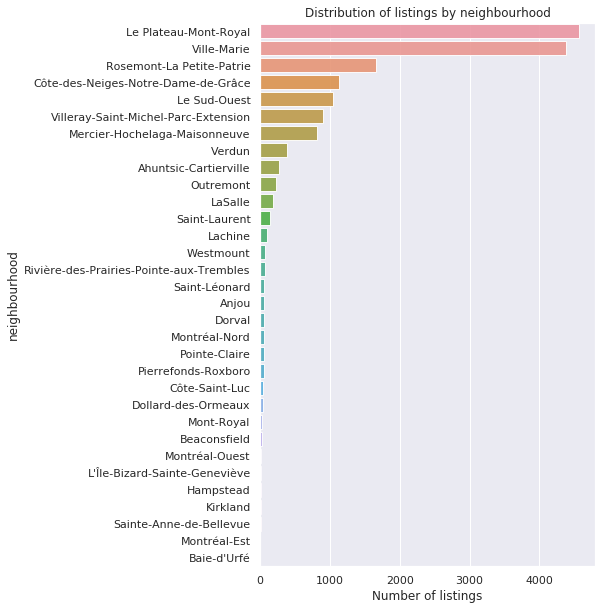

In [1518]:
## Distribution of listings by neighbourhood
neighbourhood_count = montreal_listing['neighbourhood'].value_counts()
sns.set(style="darkgrid")
sns.barplot( neighbourhood_count.values, neighbourhood_count.index, label="neighbourhood", alpha=0.9)
fig = plt.gcf()
fig.set_size_inches(6,10)
plt.title('Distribution of listings by neighbourhood')
plt.xlabel('Number of listings', fontsize=12)
plt.ylabel('neighbourhood', fontsize=12) 
plt.show()

Note: Nous remarquons que la distribution est asymétrique dans lequel la plupart des annonces sont dans les arrondissements: Le Plateau-Mont-Royal et Ville-Marie (Le centre ville) 

In [1519]:
for neighbourhood in neighbourhood_count.index:
    print(neighbourhood)
    print(montreal_listing[montreal_listing['neighbourhood']==neighbourhood]['price'].describe())

Le Plateau-Mont-Royal
count     4569.000000
mean       116.513460
std        280.017188
min         12.000000
25%         50.000000
50%         82.000000
75%        125.000000
max      13294.000000
Name: price, dtype: float64
Ville-Marie
count    4380.000000
mean      128.967580
std       160.724863
min        13.000000
25%        60.000000
50%        93.000000
75%       145.000000
max      3263.000000
Name: price, dtype: float64
Rosemont-La Petite-Patrie
count    1658.000000
mean       93.381785
std        91.491508
min        13.000000
25%        50.000000
50%        74.000000
75%       101.000000
max      1305.000000
Name: price, dtype: float64
Côte-des-Neiges-Notre-Dame-de-Grâce
count    1134.000000
mean       92.847443
std       222.036162
min        13.000000
25%        40.000000
50%        66.000000
75%       101.000000
max      6969.000000
Name: price, dtype: float64
Le Sud-Ouest
count    1038.000000
mean      104.322736
std        93.672313
min        14.000000
25%        50.0

Note: nous pouvons voir dans notre resultats statistiques que nous avons des valeurs extrêmes, nous devons donc les supprimer pour une meilleure visualisation.  
    
À Montréal, généralement le prix maximum du loyer d'une chambre / appartement est 400 dollars par nuit, dans ce cas nous fixons le prix maximum à 400 dollars, ensuite nous regarderons le pourcentage d’annonces  gardés dans notre base de données par rapport aux annonces supprimés.

In [1520]:
#creating a sub-dataframe with no extreme values / less than 400 
sub_montreal_listing=montreal_listing[montreal_listing.price < 400]
print('La taille la base de données quand la valeur de prix d’une chambre / appartement est maximum égale 400 Dollars:', len(sub_montreal_listing))

pourcentage = round(100-((len(sub_montreal_listing)*100)/len(montreal_listing)),2)
print('Le pourcentage des annonces supprimés par rapport au total des annonces est:', pourcentage,'%')

La taille la base de données quand la valeur de prix d’une chambre / appartement est maximum égale 400 Dollars: 16171
Le pourcentage des annonces supprimés par rapport au total des annonces est: 1.99 %


Note: Dans ce cas, il est important de supprimer les annonces extrêmement élevées (1,99%) car elles sont aberrantes et affecteront négativement notre analyse et notre prédiction.

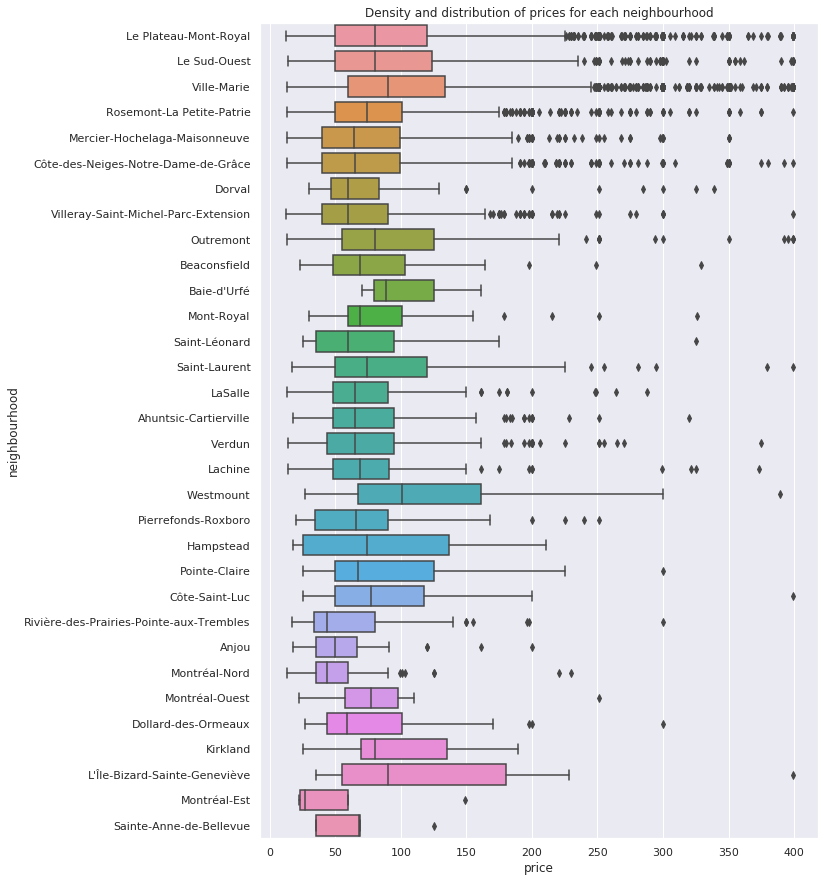

In [1521]:
sns.boxplot('price', 'neighbourhood', data= sub_montreal_listing )
fig = plt.gcf()
fig.set_size_inches(10,15)
plt.title('Density and distribution of prices for each neighbourhood')
plt.xlabel('price', fontsize=12)
plt.ylabel('neighbourhood', fontsize=12) 
plt.show()

Avec les résultats statistiques et les boxplot, nous pouvons observer quelques choses sur la distribution des prix d'Airbnb dans les arrondissements de Montréal. Tout d'abord, nous pouvons affirmer que L'Île-Bizard-Sainte-Geneviève a la gamme de prix la plus élevée pour les annonces avec la moyenne de prix de 159 dollars par nuit, 
suivie de Westmount avec 143 dollars par nuit.
le Montréal-Est est le moins cher de tous avec un  56 dollars par nuit. Ici, nous avons considéré la valeur statistique moyenne et nous avons pas pris les valeurs aberrants sur le calcul de la moyenne. L'autre possibilité est de prendre la valeur de la médiane.

###### Analyser la densité et la répartition des annonces dans les arrondissements de Montréal (Map) 

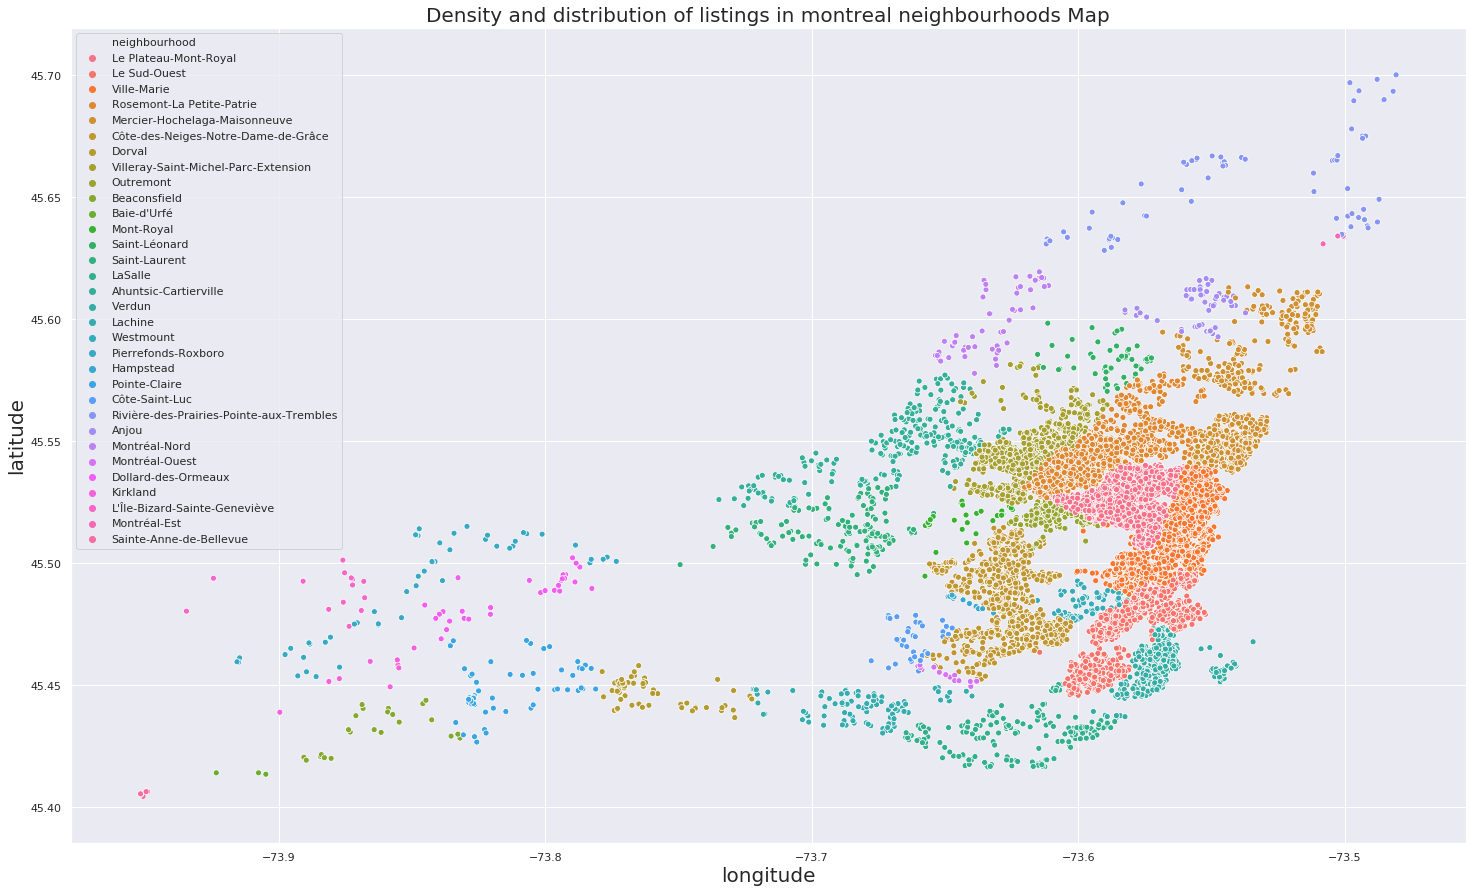

In [1522]:
plt.figure(figsize=(25,15))
sns.scatterplot(montreal_listing.longitude,montreal_listing.latitude,hue=montreal_listing.neighbourhood)
plt.title('Density and distribution of listings in montreal neighbourhoods Map', fontsize=20)
plt.xlabel('longitude', fontsize=20)
plt.ylabel('latitude', fontsize=20) 
plt.ioff()

Note: Nous remarquons à partir de la map que la densité et la répartition des annonces sont presque toute au centre ville de Montréal ou moins de 4 km de centre.

###### Analyser le prix

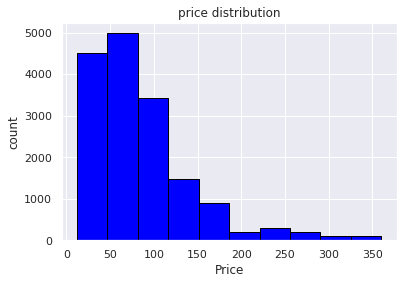

In [1523]:
counts, bins = np.histogram(sub_montreal_listing.price)
plt.hist(bins[:-1], color = 'blue', edgecolor = 'black', weights=counts)
plt.title('price distribution')
plt.xlabel('Price')
plt.ylabel('count')
plt.show()

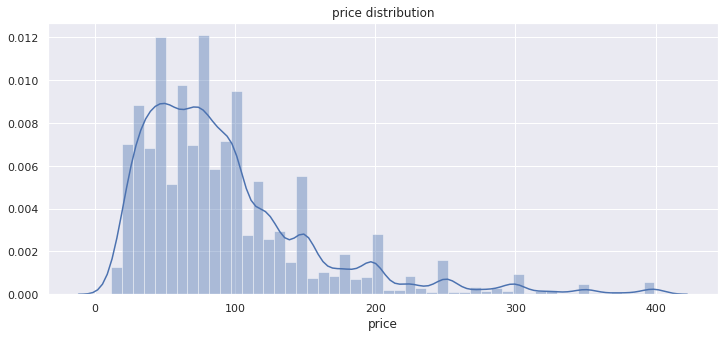

In [1524]:
plt.figure(figsize=(12,5))
plt.title('price distribution')
plt.xlabel('Price')
ax = sns.distplot(sub_montreal_listing["price"], color = 'b')

Note: nous remarquons que la densité de la distribution des prix d'une chambre / appartement est entre 20 à 150 dollars selon l'arrondissement. 

###### Analyser le type de chambre

In [1525]:
room_type_count = sub_montreal_listing['room_type'].value_counts()
print(room_type_count)

Entire home/apt    11716
Private room        4264
Shared room          135
Hotel room            56
Name: room_type, dtype: int64


Note: Ajouter une colonne room_type_category

In [1526]:
room_type_category=list()
for feature in sub_montreal_listing['room_type']: 
    if feature == 'Entire home/apt':
        room_type_category.append(1)
    elif feature == 'Private room':
        room_type_category.append(2)
    elif feature == 'Shared room':
        room_type_category.append(3)    
    else:
        room_type_category.append(4)

sub_montreal_listing['room_type_category']=room_type_category
sub_montreal_listing['room_type_category'].value_counts()

1    11716
2     4264
3      135
4       56
Name: room_type_category, dtype: int64

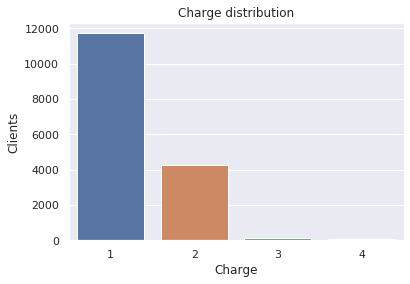

In [1527]:
sns.countplot('room_type_category', data=sub_montreal_listing)
plt.title('Charge distribution')
plt.xlabel('Charge')
plt.ylabel('Clients')
plt.show()

> Répartition des prix pour chaque type de chambre / Appartement

"Private room" 

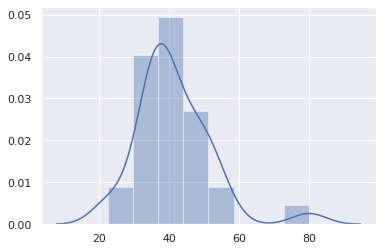

In [1528]:
df_neighbourhood_price = sub_montreal_listing[sub_montreal_listing.room_type == "Private room"][["neighbourhood","price"]]
df_neighbourhood_price_grouped_median = df_neighbourhood_price.groupby("neighbourhood").median()
sns.distplot(df_neighbourhood_price_grouped_median)
plt.show()

In [1529]:
# Median price values of Private room in each neighbourhood
df_neighbourhood_price_grouped_median

,price
neighbourhood,
Ahuntsic-Cartierville,40.0
Anjou,35.0
Beaconsfield,50.0
Côte-Saint-Luc,40.0
Côte-des-Neiges-Notre-Dame-de-Grâce,38.0
Dollard-des-Ormeaux,44.0
Dorval,50.0
Hampstead,22.5
Kirkland,80.0


'Entire home/apt'  

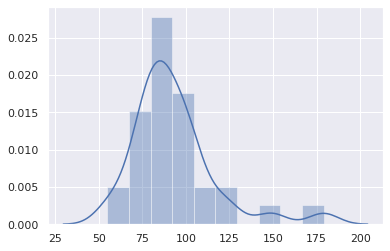

In [1530]:
df_neighbourhood_price = sub_montreal_listing[sub_montreal_listing.room_type == "Entire home/apt"][["neighbourhood","price"]]
df_neighbourhood_price_grouped_median = df_neighbourhood_price.groupby("neighbourhood").median()
sns.distplot(df_neighbourhood_price_grouped_median)
plt.show()

'Shared room'

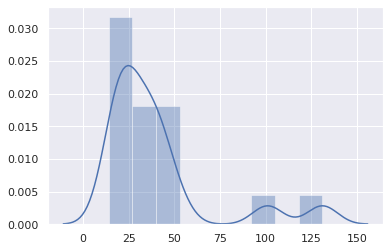

In [1531]:
df_neighbourhood_price = sub_montreal_listing[sub_montreal_listing.room_type == "Shared room"][["neighbourhood","price"]]
df_neighbourhood_price_grouped_median = df_neighbourhood_price.groupby("neighbourhood").median()
sns.distplot(df_neighbourhood_price_grouped_median)
plt.show()

'Hotel room' 

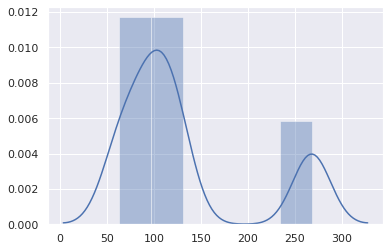

In [1532]:
df_neighbourhood_price = sub_montreal_listing[sub_montreal_listing.room_type == "Hotel room"][["neighbourhood","price"]]
df_neighbourhood_price_grouped_median = df_neighbourhood_price.groupby("neighbourhood").median()
sns.distplot(df_neighbourhood_price_grouped_median)
plt.show()

In [1533]:
# Median price values of Hotel room in each neighbourhood
df_neighbourhood_price_grouped_median

,price
neighbourhood,
Côte-des-Neiges-Notre-Dame-de-Grâce,63
Le Plateau-Mont-Royal,107
Le Sud-Ouest,90
Mercier-Hochelaga-Maisonneuve,268
Ville-Marie,125


###### Top 10 des hôtes Airbnb (les plus populaires)

Ceci est la liste des 10 hôtes les plus populaires des arrondissements. La raison de leur popularité peut dépendre du prix, du quartier, de la propreté ou bien d'autres facteurs.

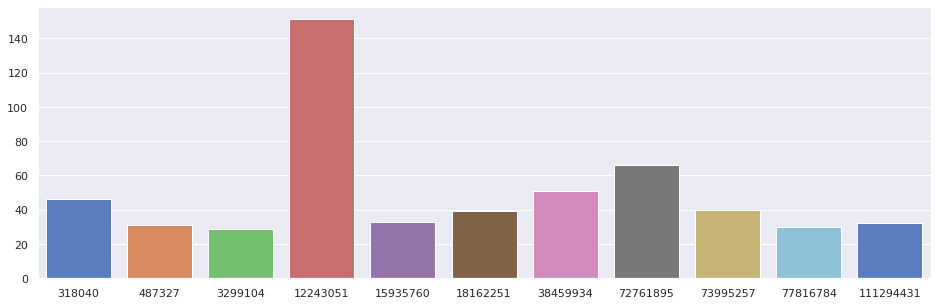

In [1534]:
df1 = sub_montreal_listing.host_id.value_counts()[:11]
f,ax = plt.subplots(figsize=(16,5))
ax = sns.barplot(x = df1.index,y=df1.values,palette="muted")
plt.show()

###### Le prix median de 10 meilleures annonces les plus revues à Montréal

In [1535]:
top_reviewed_listings=sub_montreal_listing[sub_montreal_listing.room_type == "Private room"].nlargest(10,'number_of_reviews')
price_avrg=top_reviewed_listings[sub_montreal_listing.room_type == "Private room"].price.median()
print('Average price per night for a Private room:',round(price_avrg,2),'$')

Average price per night for a Private room: 62.0 $


In [1536]:
top_reviewed_listings=sub_montreal_listing[sub_montreal_listing.room_type == "Entire home/apt"].nlargest(10,'number_of_reviews')
price_avrg=top_reviewed_listings[sub_montreal_listing.room_type == "Entire home/apt"].price.median()
print('Average price per night for a Entire home/apt:',round(price_avrg,2),'$')

Average price per night for a Entire home/apt: 97.5 $


In [1537]:
top_reviewed_listings=sub_montreal_listing[sub_montreal_listing.room_type == "Shared room"].nlargest(10,'number_of_reviews')
price_avrg=top_reviewed_listings[sub_montreal_listing.room_type == "Shared room"].price.median()
print('Average price per night for a Shared room:',round(price_avrg,2),'$')

Average price per night for a Shared room: 39.0 $


In [1538]:
top_reviewed_listings=sub_montreal_listing[sub_montreal_listing.room_type == "Hotel room"].nlargest(10,'number_of_reviews')
price_avrg=top_reviewed_listings[sub_montreal_listing.room_type == "Hotel room"].price.median()
print('Average price per night for a Hotel room:',round(price_avrg,2),'$')

Average price per night for a Hotel room: 70.5 $


###### Analyser la corrélation between les différents variables

S’il y a une relation de corrélation entre un point A et B, une reproduction de A créer une reproduction de B et l'inverse est vrai aussi.

In [1539]:
# calculate the correlation matrix
corr = sub_montreal_listing[['room_type_category', 'number_of_reviews','neighbourhood','calculated_host_listings_count', 'room_type', 'minimum_nights', 'availability_365', 'price']].corr()
#corr = sub_montreal_listing.corr()

cm = sns.light_palette("red", as_cmap=True)
s = corr.style.background_gradient(cmap=cm)
s

,room_type_category,number_of_reviews,calculated_host_listings_count,minimum_nights,availability_365,price
room_type_category,1.000000,-0.105742,-0.098852,-0.001626,-0.013935,-0.385446
number_of_reviews,-0.105742,1.000000,0.030599,-0.019150,0.138791,0.057713
calculated_host_listings_count,-0.098852,0.030599,1.000000,0.001591,0.147185,0.061741
minimum_nights,-0.001626,-0.019150,0.001591,1.000000,0.032243,-0.011589
availability_365,-0.013935,0.138791,0.147185,0.032243,1.000000,0.126336
price,-0.385446,0.057713,0.061741,-0.011589,0.126336,1.000000


Note: Il ne semble pas exister de corrélations évidentes et fortes entre ces patterns. Le prix est faible en corrélation avec la plus part des variables numériques.

## 2. Features Engineering

In [1540]:
feature_sub_montreal_listing = sub_montreal_listing.copy()
feature_sub_montreal_listing.drop(['latitude','longitude','room_type_category'],axis=1,inplace=True)
#feature_sub_montreal_listing.drop(['room_type_category'],axis=1,inplace=True)
feature_sub_montreal_listing.head()

,host_id,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2277,Le Plateau-Mont-Royal,Private room,39,2,245,2.41,1,226
1,2319,Le Sud-Ouest,Private room,30,1,143,1.11,5,18
2,57358,Le Plateau-Mont-Royal,Entire home/apt,175,3,171,1.63,1,363
3,125031,Ville-Marie,Entire home/apt,81,2,319,2.74,2,318
4,125031,Ville-Marie,Entire home/apt,145,3,65,0.68,2,344


In [1541]:
# for the prediction model
data_prediction_model = feature_sub_montreal_listing.copy()

###### Gestion des features categorical

In [1542]:
# Encoding categorical features (proposed 1)
categorical_features=['room_type', 'neighbourhood']

for feature in categorical_features:
    labels_ordered=feature_sub_montreal_listing.groupby([feature])['price'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    feature_sub_montreal_listing[feature]=feature_sub_montreal_listing[feature].map(labels_ordered)

feature_sub_montreal_listing.head(10)

,host_id,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2277,26,1,39,2,245,2.41,1,226
1,2319,25,1,30,1,143,1.11,5,18
2,57358,26,2,175,3,171,1.63,1,363
3,125031,29,2,81,2,319,2.74,2,318
4,125031,29,2,145,3,65,0.68,2,344
5,2319,25,1,30,1,151,1.30,5,354
6,149769,16,2,140,4,4,0.04,1,275
7,381468,26,2,140,3,37,0.65,7,365
8,163569,29,1,50,1,14,0.14,3,365
9,2319,25,2,101,1,395,3.44,5,0


In [1227]:
export_csv = feature_sub_montreal_listing.to_csv (r'/home/bilal/IA/Demo/knn_model_Airbnb_Heroku/df_mtl_features_engineering.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

In [1100]:
# Encoding categorical features (proposed 2)

data_encoded = sub_montreal_listing.copy()

data_encoded = pd.get_dummies(data_encoded, columns=['neighbourhood'], drop_first=True)
data_encoded = pd.get_dummies(data_encoded, columns=['room_type'], drop_first=True)

data_encoded.head(10)

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_category,neighbourhood_Anjou,neighbourhood_Baie-d'Urfé,neighbourhood_Beaconsfield,neighbourhood_Côte-Saint-Luc,neighbourhood_Côte-des-Neiges-Notre-Dame-de-Grâce,neighbourhood_Dollard-des-Ormeaux,neighbourhood_Dorval,neighbourhood_Hampstead,neighbourhood_Kirkland,neighbourhood_L'Île-Bizard-Sainte-Geneviève,neighbourhood_LaSalle,neighbourhood_Lachine,neighbourhood_Le Plateau-Mont-Royal,neighbourhood_Le Sud-Ouest,neighbourhood_Mercier-Hochelaga-Maisonneuve,neighbourhood_Mont-Royal,neighbourhood_Montréal-Est,neighbourhood_Montréal-Nord,neighbourhood_Montréal-Ouest,neighbourhood_Outremont,neighbourhood_Pierrefonds-Roxboro,neighbourhood_Pointe-Claire,neighbourhood_Rivière-des-Prairies-Pointe-aux-Trembles,neighbourhood_Rosemont-La Petite-Patrie,neighbourhood_Saint-Laurent,neighbourhood_Saint-Léonard,neighbourhood_Sainte-Anne-de-Bellevue,neighbourhood_Verdun,neighbourhood_Ville-Marie,neighbourhood_Villeray-Saint-Michel-Parc-Extension,neighbourhood_Westmount,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,2277,45.53069,-73.58588,39,2,245,2.41,1,226,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2319,45.48442,-73.57923,30,1,143,1.11,5,18,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,57358,45.54135,-73.57814,175,3,171,1.63,1,363,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,125031,45.51888,-73.56546,81,2,319,2.74,2,318,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,125031,45.52020,-73.56422,145,3,65,0.68,2,344,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,2319,45.48358,-73.57892,30,1,151,1.30,5,354,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,149769,45.53840,-73.60355,140,4,4,0.04,1,275,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,381468,45.52836,-73.58342,140,3,37,0.65,7,365,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,163569,45.52671,-73.55917,50,1,14,0.14,3,365,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
9,2319,45.48430,-73.57939,101,1,395,3.44,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


###### Feature Scaling

Nous allons utiliser le features scaling car les features sont de différents types et measures, on utilise le feature scaling pour que notre modèle d'apprentissage comprends mieux les features et soit bien entraîné 

In [1543]:
# MinMaxScaler (proposed 1)
# we use minmaxscaler because we haven't a negative value scented we use normalised scaler (as a général standerscaler)

feature_scale=[feature for feature in feature_sub_montreal_listing.columns if feature not in ['host_id','price']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(feature_sub_montreal_listing[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [1544]:
scaler.transform(feature_sub_montreal_listing[feature_scale])

array([[8.38709677e-01, 3.33333333e-01, 8.55944535e-05, ...,
        1.66551006e-01, 0.00000000e+00, 6.19178082e-01],
       [8.06451613e-01, 3.33333333e-01, 0.00000000e+00, ...,
        7.63358779e-02, 2.66666667e-02, 4.93150685e-02],
       [8.38709677e-01, 6.66666667e-01, 1.71188907e-04, ...,
        1.12421929e-01, 0.00000000e+00, 9.94520548e-01],
       ...,
       [9.35483871e-01, 3.33333333e-01, 0.00000000e+00, ...,
        1.38098543e-01, 6.66666667e-02, 4.63013699e-01],
       [8.38709677e-01, 3.33333333e-01, 0.00000000e+00, ...,
        6.87022901e-02, 1.00000000e-01, 9.26027397e-01],
       [8.06451613e-01, 6.66666667e-01, 0.00000000e+00, ...,
        6.87022901e-02, 0.00000000e+00, 6.54794521e-01]])

In [1545]:
# transform the data, and add on the host_id and price variables
feature_sub_montreal_listing = pd.concat([feature_sub_montreal_listing[['host_id', 'price']].reset_index(drop=True), pd.DataFrame(scaler.transform(feature_sub_montreal_listing[feature_scale]), columns=feature_scale)], axis=1)

In [1546]:
feature_sub_montreal_listing.head()

,host_id,price,neighbourhood,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2277,39,0.838710,0.333333,0.000086,0.361481,0.166551,0.000000,0.619178
1,2319,30,0.806452,0.333333,0.000000,0.210370,0.076336,0.026667,0.049315
2,57358,175,0.838710,0.666667,0.000171,0.251852,0.112422,0.000000,0.994521
3,125031,81,0.935484,0.666667,0.000086,0.471111,0.189452,0.006667,0.871233
4,125031,145,0.935484,0.666667,0.000171,0.094815,0.046495,0.006667,0.942466


In [1391]:
# Normalise Dataframe (proposed 2)
#num_features=['host_id','reviews_per_month','number_of_reviews','calculated_host_listings_count', 'minimum_nights', 'availability_365', 'price']
feature_scale=[feature for feature in feature_sub_montreal_listing.columns if feature not in ['host_id','price']]
data = pd.DataFrame()
for feature in feature_scale:
    #feature_sub_montreal_listing[feature]=np.log(feature_sub_montreal_listing[feature])
    data[feature] = (feature_sub_montreal_listing[feature] - feature_sub_montreal_listing[feature].mean())/ (feature_sub_montreal_listing[feature].std())

# transform the data, and add on the host_id and price variables
#data = pd.concat([feature_sub_montreal_listing[['host_id', 'price']].reset_index(drop=True), pd.DataFrame(scaler.transform(feature_sub_montreal_listing[feature_scale]), columns=feature_scale)], axis=1)

data.insert(loc=0, column='host_id', value=feature_sub_montreal_listing['host_id'])
data.insert(loc=1, column='price', value=feature_sub_montreal_listing['price'])
feature_sub_montreal_listing = data.copy()
feature_sub_montreal_listing.head()

,host_id,price,neighbourhood,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2277,39,0.572941,-1.528240,-0.064892,4.360657,0.545233,-0.296132,0.909156
1,2319,30,0.452172,-1.528240,-0.075279,2.303350,-0.176243,-0.066604,-0.709897
2,57358,175,0.572941,0.585261,-0.054505,2.868101,0.112347,-0.296132,1.975552
3,125031,81,0.935247,0.585261,-0.064892,5.853213,0.728377,-0.238750,1.625276
4,125031,145,0.935247,0.585261,-0.054505,0.730115,-0.414885,-0.238750,1.827658


## 3. Sélection des features

In [1547]:
# Data filtering
# Filter the dataset for prices between 0 and $120
feature_sub_montreal_listing = feature_sub_montreal_listing.loc[(feature_sub_montreal_listing['price'] < 120)]
# Filter the dataset for prices superior to $150
#feature_sub_montreal_listing = feature_sub_montreal_listing.loc[(feature_sub_montreal_listing['price'] > 150)]
len(feature_sub_montreal_listing)

12225

In [1548]:
## Split data and feature slection data (proposed 1)

x_train = feature_sub_montreal_listing.iloc[0:10000]
y_train = feature_sub_montreal_listing.iloc[0:10000]['price'].values
y_train = np.log10(y_train)
x_test = feature_sub_montreal_listing.iloc[10000:]
y_test = feature_sub_montreal_listing.iloc[10000:]['price'].values
y_test = np.log10(y_test)

selected_feat = ['neighbourhood', 'room_type', 'availability_365']
x_train=x_train[selected_feat]
x_test =x_test[selected_feat] 

In [1268]:
## Split data and feature slection (proposed 2)

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

#Defining the independent variables and dependent variables
airbnb_en=feature_sub_montreal_listing.copy()
#x = airbnb_en.iloc[:,[0,2,3,4,5,7,8,9,10]]
x = airbnb_en.iloc[:,[0,2,3,4,5,7,8]]

# use log10 for the price for a good result
y = airbnb_en['price'].values
y = np.log10(y)

#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [1345]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(x_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [1346]:
feature_sel_model.get_support()

array([False,  True, False, False, False, False, False, False, False])

In [1271]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = x_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 7
selected features: 4


In [1347]:
selected_feat

Index(['neighbourhood', 'room_type', 'number_of_reviews', 'availability_365'], dtype='object')

In [1549]:
x_train=x_train[selected_feat]
x_test =x_test[selected_feat] 
x_test.head()

,neighbourhood,room_type,availability_365
13106,0.935484,0.333333,0.243836
13109,0.451613,0.333333,0.490411
13110,0.838710,0.333333,0.884932
13111,0.290323,0.666667,0.284932
13112,0.290323,0.666667,0.000000


In [1397]:
x_test.head()
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6171 entries, 12128 to 20397
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   neighbourhood     6171 non-null   float64
 1   room_type         6171 non-null   float64
 2   availability_365  6171 non-null   float64
dtypes: float64(3)
memory usage: 192.8 KB


## 4. Modèles de Prédiction

In [1550]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import * # importer tout les metrics d'erreurs

###### K Neighbors Regressor model

In [1551]:
#Prepare a K Neighbors Regressor (Knn) and Fitting model with trainig data
knn = KNeighborsRegressor(n_neighbors=5, algorithm='brute')  # création une instance 
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [1552]:
# Compare predicted and actual values
print('Comparison between the 10 real annonces prices and the predicted prices ')
df = pd.DataFrame({'Actual': np.round(10 ** y_test, 0), 
                   'Predicted': np.round(10 ** y_pred, 0), 'neighbourhood': x_test['neighbourhood'], 'room_type': x_test['room_type']})
df.head(10)

Comparison between the 10 real annonces prices and the predicted prices 


,Actual,Predicted,neighbourhood,room_type
13106,55.0,41.0,0.935484,0.333333
13109,35.0,59.0,0.451613,0.333333
13110,78.0,47.0,0.838710,0.333333
13111,87.0,100.0,0.290323,0.666667
13112,90.0,55.0,0.290323,0.666667
13113,74.0,55.0,0.290323,0.666667
13115,80.0,72.0,0.838710,0.666667
13117,101.0,67.0,0.838710,0.666667
13118,21.0,28.0,0.290323,0.333333
13120,38.0,61.0,0.838710,0.333333


In [1484]:
#neighbourhood = montreal_listing['neighbourhood'].value_counts()
#print(neighbourhood)

In [1485]:
#neighbourhood = dfff['neighbourhood'].value_counts()
#print(neighbourhood)

In [1490]:
# Recoding neighbourhood and room_type
neighbourhood_category=list()
for feature in df['neighbourhood']: 
    if round(feature,2) == round(0.935247 ,2):
        neighbourhood_category.append('Le Plateau-Mont-Royal')
    elif round(feature,2) == round(0.572941,2):
        neighbourhood_category.append('Ville-Marie')     
    elif round(feature,2) == round(-0.634748,2):
        neighbourhood_category.append('Rosemont-La Petite-Patrie') 
    elif round(feature,2) == round(-1.963205,2):
        neighbourhood_category.append('Mercier-Hochelaga-Maisonneuve') 
    else:
        neighbourhood_category.append('Le Sud-Ouest')    


df['neighbourhood_category']=neighbourhood_category

room_type_category=list()
for feature in df['room_type']: 
    if round(feature,2) == round(0.585261,2):
        room_type_category.append('Entire home/apt')
    elif round(feature,2) == round(-1.52824,2):
        room_type_category.append('Private room')
    elif round(feature,2) == (-3.641740,2):
        room_type_category.append('Shared room')    
    else:
        room_type_category.append('Hotel room')

df['room_type_category']=room_type_category


df = df.drop(['neighbourhood','room_type'], axis=1)
df.head(10)

,Actual,Predicted,neighbourhood_category,room_type_category
12128,101.0,110.0,Le Plateau-Mont-Royal,Entire home/apt
12129,48.0,42.0,Le Plateau-Mont-Royal,Private room
12130,149.0,127.0,Le Sud-Ouest,Entire home/apt
12131,101.0,129.0,Rosemont-La Petite-Patrie,Entire home/apt
12132,251.0,109.0,Le Plateau-Mont-Royal,Entire home/apt
12133,35.0,52.0,Le Sud-Ouest,Private room
12134,129.0,112.0,Ville-Marie,Entire home/apt
12135,70.0,106.0,Mercier-Hochelaga-Maisonneuve,Entire home/apt
12136,131.0,89.0,Le Plateau-Mont-Royal,Entire home/apt
12137,159.0,117.0,Le Plateau-Mont-Royal,Entire home/apt


In [1276]:
print('Results of the evaluation of our knn model with different the Measures:')
print('R2 (score):',r2_score(y_test,y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Median ABS Error:', median_absolute_error(y_test, y_pred))

Results of the evaluation of our knn model with different the Measures:
R2 (score): 0.3571621153901833
MAE: 0.1260784093325935
MSE: 0.026080951890515403
RMSE: 0.16149598103518056
Median ABS Error: 0.10430293155524017


###### Analyser le taux d'erreur de prédiction en forme graphique pour le model knn  

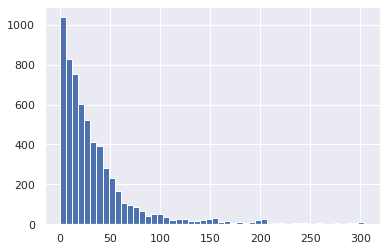

In [1447]:
err_hist= np.abs(df.Actual - df.Predicted)
plt.hist(err_hist, bins=50)
plt.show()

###### Linear Regression Model

In [1553]:
#Prepare a Linear Regression (LR) Model and Fitting model with trainig data
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [1554]:
# Compare predicted and actual values
print('Comparison between the 10 real annonces prices and the predicted prices ')
df = pd.DataFrame({'Actual': np.round(10 ** y_test, 0), 
                   'Predicted': np.round(10 ** y_pred, 0), 'neighbourhood': x_test['neighbourhood'], 'room_type': x_test['room_type']})
df.head(10)

Comparison between the 10 real annonces prices and the predicted prices 


,Actual,Predicted,neighbourhood,room_type
13106,55.0,43.0,0.935484,0.333333
13109,35.0,39.0,0.451613,0.333333
13110,78.0,45.0,0.838710,0.333333
13111,87.0,65.0,0.290323,0.666667
13112,90.0,63.0,0.290323,0.666667
13113,74.0,63.0,0.290323,0.666667
13115,80.0,72.0,0.838710,0.666667
13117,101.0,74.0,0.838710,0.666667
13118,21.0,36.0,0.290323,0.333333
13120,38.0,45.0,0.838710,0.333333


In [1555]:
print('Results of the evaluation of our LR model with different Measures:')
print('R2 (score):',r2_score(y_test,y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Median ABS Error:', median_absolute_error(y_test, y_pred))

Results of the evaluation of our LR model with different Measures:
R2 (score): 0.4156334190850187
MAE: 0.1196577766253214
MSE: 0.02231588822894729
RMSE: 0.1493850334837707
Median ABS Error: 0.10562540180915714


###### Analyser le taux d'erreur de prédiction en forme graphique pour le model LR  

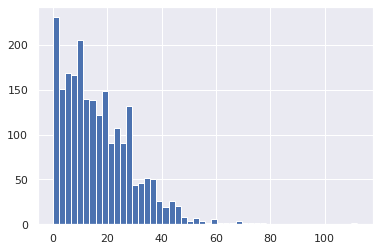

In [1556]:
err_hist= np.abs(df.Actual - df.Predicted)
plt.hist(err_hist, bins=50)
plt.show()

Note: on remarque nos erreurs suivent une loi de Distribution Exponentielle

In [1089]:
#x_test.loc[10729]

## Conclusion

Nous avons utilisé plusieur measures pour évaluer nos modèle proposés, et les measures MAE et RMSE nous donnent une idée sur le taux d'erreur de prédiction (Taux d'erreur max ~15% Vs ~85% Taux de réussite) et (09% Vs 91%) par rapport le Median ABS Error. les 2 deux modèles proposés donnent une bonnes prédictions comme une 1ère proposition, et sans beaucoup de temps investi sur l’amélioration et l'optimisation de de nos modèles avec leurs paramètres, surtout avec le manque de quelques features (données) importants tel ques, le nombre de lits disponibles, le nombre de personnes à accueillir,  salles de bain, ..., etc qui peuvent minimiser le taux d'erreur de nos modèles.

In [1562]:
#data_test = pd.DataFrame({'neighbourhood': ['0.935484'], 'room_type': ['0.333333'], 'availability_365': ['0.243836']})
#y_data_pred=reg.predict(data_test)
#print('The prediction price is:',np.round(10 ** y_data_pred, 0) )

The prediction price is: [43.]
